## Problem: A non linear Function

In [51]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
x = np.arange(-1,1,0.01)
y = np.arange(-1,1,0.01)

In [54]:
X, Y = np.meshgrid(x, y)
c = np.ones((200,200))
e = np.random.rand(200,200)*0.1

Let us take a non-linear function - Hyperbolic Paraboloid

$$ Z = 2X^2 - 3Y^2  + 1 + \epsilon $$

In [57]:
Z = 2*X**2 - 3*Y**2 + 1*c + e

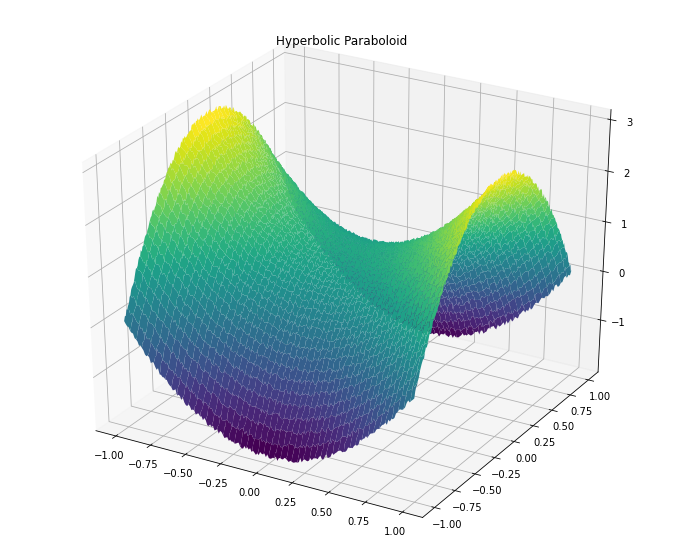

In [58]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(X, Y, Z,cmap='viridis')
ax.set_title('Hyperbolic Paraboloid');

## Using Neural Network

### Step 0: Load the Keras Model

In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### Step 1: Create the input and output

In [78]:
#Translates slice objects to concatenation along the second axis.
input_xy = np.c_[X.reshape(-1),Y.reshape(-1)]
output_z = Z.reshape(-1)

In [61]:
# Features + Target
input_xy.shape,output_z.shape

((40000, 2), (40000,))

### Step 2: Create the Transformation & Prediction Model

In [70]:
model = Sequential()
model.add(Dense(64, input_dim=2,  activation="relu"))
model.add(Dense(32,  activation="relu"))
model.add(Dense(1))

In [71]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                192       
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 33        
Total params: 2,305
Trainable params: 2,305
Non-trainable params: 0
_________________________________________________________________


### Step 3: Compile the Model - Loss, Optimizer and Fit the Model

In [72]:
from tensorflow.keras.optimizers import RMSprop
#model.compile(loss='mse', optimizer=RMSprop(lr=0.00001), metrics=["mse"])
model.compile(loss='mse', optimizer=RMSprop(lr=0.1), metrics=["mse"])

https://keras.rstudio.com/reference/fit.html

In [73]:
%%time

epochs =12

output = model.fit(input_xy, 
                   output_z, 
                   epochs=epochs, 
                   shuffle=True, 
                   verbose=1)

Epoch 1/12
1250/1250 [==============================] - 2s 1ms/step - loss: 1.7397 - mse: 1.7397
Epoch 2/12
1250/1250 [==============================] - 1s 1ms/step - loss: 1.3374 - mse: 1.3374
Epoch 3/12
1250/1250 [==============================] - 1s 1ms/step - loss: 1.0635 - mse: 1.0635
Epoch 4/12
1250/1250 [==============================] - 1s 1ms/step - loss: 0.8753 - mse: 0.8753
Epoch 5/12
1250/1250 [==============================] - 1s 1ms/step - loss: 0.7317 - mse: 0.7317
Epoch 6/12
1250/1250 [==============================] - 1s 1ms/step - loss: 0.5868 - mse: 0.5868
Epoch 7/12
1250/1250 [==============================] - 1s 1ms/step - loss: 0.4539 - mse: 0.4539
Epoch 8/12
1250/1250 [==============================] - 1s 1ms/step - loss: 0.3438 - mse: 0.3438
Epoch 9/12
1250/1250 [==============================] - 1s 1ms/step - loss: 0.2462 - mse: 0.2462
Epoch 10/12
1250/1250 [==============================] - 1s 1ms/step - loss: 0.1704 - mse: 0.1704
Epoch 11/12
1250/1250 [======

### Step 4: Evaluate Model Performance

In [74]:
!pip install plot_keras_history

Epoch 1/12
1250/1250 [==============================] - 1s 1ms/step - loss: 0.0606 - mse: 0.0606
Epoch 2/12
1250/1250 [==============================] - 1s 1ms/step - loss: 0.0525 - mse: 0.0525
Epoch 3/12
1250/1250 [==============================] - 1s 1ms/step - loss: 0.0472 - mse: 0.0472
Epoch 4/12
1250/1250 [==============================] - 1s 1ms/step - loss: 0.0431 - mse: 0.0431
Epoch 5/12
1250/1250 [==============================] - 1s 1ms/step - loss: 0.0397 - mse: 0.0397
Epoch 6/12
1250/1250 [==============================] - 1s 1ms/step - loss: 0.0366 - mse: 0.0366
Epoch 7/12
1250/1250 [==============================] - 1s 1ms/step - loss: 0.0337 - mse: 0.0337
Epoch 8/12
1250/1250 [==============================] - 1s 1ms/step - loss: 0.0311 - mse: 0.0311
Epoch 9/12
1250/1250 [==============================] - 1s 1ms/step - loss: 0.0286 - mse: 0.0286
Epoch 10/12
1250/1250 [==============================] - 1s 1ms/step - loss: 0.0263 - mse: 0.0263
Epoch 11/12
1250/1250 [======

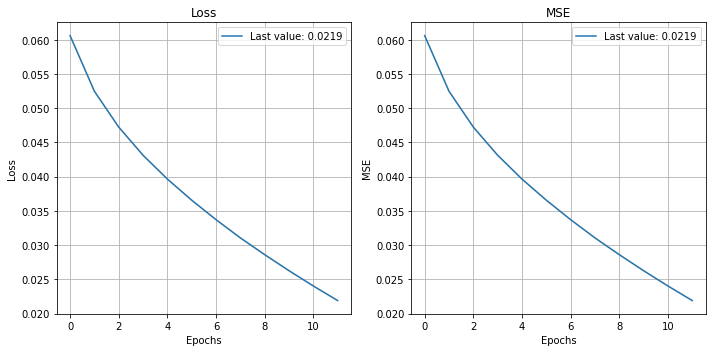

In [75]:
from plot_keras_history import plot_history
import matplotlib.pyplot as plt

history = model.fit(input_xy, 
                    output_z, 
                    epochs=epochs,
                    shuffle=True, 
                    verbose=1).history

plot_history(history);
#plt.show()

### Step 5: Make Prediction from the model

In [76]:
Z_pred = model.predict(input_xy).reshape(200,200)

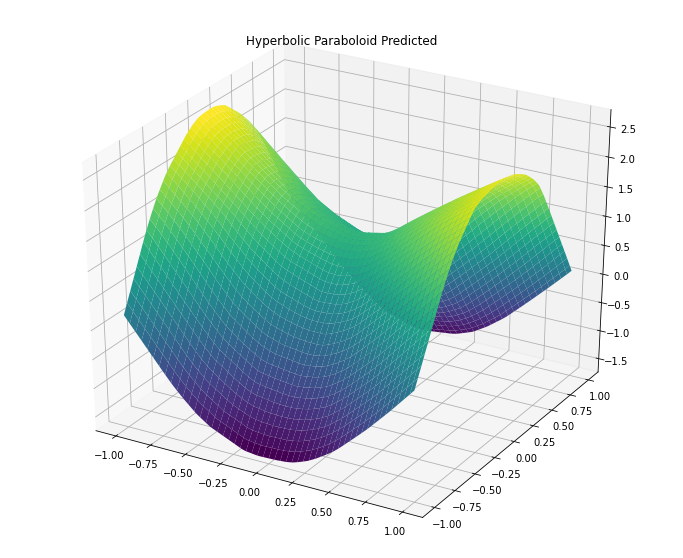

In [77]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(X, Y, Z_pred,cmap='viridis')
ax.set_title('Hyperbolic Paraboloid Predicted');